## Random Forest - CO2ads - 2bins - 72/28

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../CO2adsorption_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Precursor                     421 non-null    object 
 1   Activator                     421 non-null    object 
 2   Activator_carbon_ratio        421 non-null    object 
 3   Activation T (K)              421 non-null    int64  
 4   T adsorption (K)              421 non-null    int64  
 5   P adsorption (bar)            421 non-null    float64
 6   CO2 ads (mmol/g)              421 non-null    float64
 7   CO2ads_2bins_5050             421 non-null    int64  
 8   CO2ads_4bins                  421 non-null    int64  
 9   CO2ads_10bins                 421 non-null    int64  
 10  CO2ads_7228                   421 non-null    int64  
 11  adsorption_all_inputs         421 non-null    object 
 12  adsorption_only_BETpore       421 non-null    object 
 13  adsor

In [3]:
df["Activator_carbon_ratio"].unique()

array(['4', '1.5', '0.5', '1', '2', '3', '5', 'none', '6', '2.5', '1.25',
       '8'], dtype=object)

In [4]:
df["Activator_carbon_ratio"] = df['Activator_carbon_ratio'].replace('none', 0)

In [5]:
df["Activator_carbon_ratio"] = pd.to_numeric(df["Activator_carbon_ratio"])

In [6]:
df["Activator_carbon_ratio"].unique()

array([4.  , 1.5 , 0.5 , 1.  , 2.  , 3.  , 5.  , 0.  , 6.  , 2.5 , 1.25,
       8.  ])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precursor                   421 non-null    object 
 1   Activator-Ratio             421 non-null    object 
 2   Activator                   421 non-null    object 
 3   Activator_carbon_ratio      421 non-null    float64
 4   Activation T (K)            421 non-null    int64  
 5   BET (m2/g)                  421 non-null    float64
 6   T adsorption (K)            421 non-null    int64  
 7   P adsorption (bar)          421 non-null    float64
 8   CO2 ads (mmol/g)            421 non-null    float64
 9   Pore volume (cm3/g)         421 non-null    float64
 10  synthesis                   421 non-null    object 
 11  adsorption                  421 non-null    object 
 12  adsorption_short            421 non-null    object 
 13  adsorption_woBET            421 non

In [8]:
len(df["Precursor"].unique())

33

In [9]:
len(df["Activator"].unique())

10

In [10]:
encoder_precursor = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_precursor = encoder_precursor.fit_transform(df[["Precursor"]])
df = pd.concat([df, one_hot_precursor], axis=1)

In [11]:
encoder_activator = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_activator = encoder_activator.fit_transform(df[["Activator"]])
df = pd.concat([df, one_hot_activator], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Precursor                                 421 non-null    object 
 1   Activator-Ratio                           421 non-null    object 
 2   Activator                                 421 non-null    object 
 3   Activator_carbon_ratio                    421 non-null    float64
 4   Activation T (K)                          421 non-null    int64  
 5   BET (m2/g)                                421 non-null    float64
 6   T adsorption (K)                          421 non-null    int64  
 7   P adsorption (bar)                        421 non-null    float64
 8   CO2 ads (mmol/g)                          421 non-null    float64
 9   Pore volume (cm3/g)                       421 non-null    float64
 10  synthesis                             

In [13]:
df.columns[30:73].to_list()

['Precursor_Acai stone',
 'Precursor_Bambo',
 'Precursor_Black locust',
 'Precursor_Catkin',
 'Precursor_Celtuce leaves',
 'Precursor_Chitosan',
 'Precursor_Chrysanthemum tea',
 'Precursor_Coconut shell',
 'Precursor_Coffee grounds',
 'Precursor_Cork',
 'Precursor_Crab shell',
 'Precursor_Empty fruit bunch',
 'Precursor_Garlic peel',
 'Precursor_Lignin Waste',
 'Precursor_Lotus leaf',
 'Precursor_Olive stone',
 'Precursor_Paulownia sawdust',
 'Precursor_Peanut shell',
 'Precursor_Pineapple',
 'Precursor_Pollen',
 'Precursor_Popcorn',
 'Precursor_Poplar Wood',
 'Precursor_Rice husk',
 'Precursor_Starch and cellulose + sawdust',
 'Precursor_Sugarcane bagasse',
 'Precursor_Sunflower seed shell',
 'Precursor_Tar+CaO',
 'Precursor_Tea seed shell',
 'Precursor_Urea + tobacco',
 'Precursor_Vine shoots',
 'Precursor_Walnut shell',
 'Precursor_Waste wool',
 'Precursor_Wheat',
 'Activator_CO2',
 'Activator_CO2+N2',
 'Activator_K2C2O4',
 'Activator_K2CO3',
 'Activator_KCl-ZnCl2',
 'Activator_KOH'

In [14]:
list(df.iloc[:,[3, 4, 5, 6, 7, 9]].columns)

['Activator_carbon_ratio',
 'Activation T (K)',
 'BET (m2/g)',
 'T adsorption (K)',
 'P adsorption (bar)',
 'Pore volume (cm3/g)']

In [15]:
representation = list(df.iloc[:,[3, 4, 5, 6, 7, 9]].columns)
representation.extend(df.columns[30:73].to_list())

In [26]:
def prepare_dataset_classification(
    df,
    target = "CO2ads_7228",
    representation=representation,
    random_state=42,
    train_size=300
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [27]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=200, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [28]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 50

In [29]:
train_size = 50
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [30]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
50 371
random_state = 42
Accuracy: 0.8355795148247979
F1 macro: 0.7737013149342533
F1 micro: 0.8355795148247979
F1 weighted: 0.8269676004070415
Kappa: 0.5506780233089126
-------------Iteration 2/10
50 371
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8247978436657682
F1 macro: 0.7374380750176928
F1 micro: 0.8247978436657682
F1 weighted: 0.80561135242063
Kappa: 0.4872094754077445
-------------Iteration 3/10
50 371
random_state = 44
Accuracy: 0.8355795148247979
F1 macro: 0.7771245112811573
F1 micro: 0.8355795148247979
F1 weighted: 0.8285033828168835
Kappa: 0.5565592240619184
-------------Iteration 4/10
50 371
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8247978436657682
F1 macro: 0.7588620568971551
F1 micro: 0.8247978436657682
F1 weighted: 0.8156212135484872
Kappa: 0.5212142871324479
-------------Iteration 5/10
50 371
random_state = 46
Accuracy: 0.8086253369272237
F1 macro: 0.7279862036205169
F1 micro: 0.8086253369272237
F1 weighted: 0.794653209869131
Kappa: 0.46276845261161303
-------------Iteration 6/10
50 371
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7951482479784366
F1 macro: 0.6915638400280038
F1 micro: 0.7951482479784366
F1 weighted: 0.7720224266685726
Kappa: 0.39829278702518145
-------------Iteration 7/10
50 371
random_state = 48
Accuracy: 0.8382749326145552
F1 macro: 0.7862739073661571
F1 micro: 0.8382749326145552
F1 weighted: 0.8337283948879194
Kappa: 0.5735958930350165
-------------Iteration 8/10
50 371
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8436657681940701
F1 macro: 0.7919277481240814
F1 micro: 0.8436657681940701
F1 weighted: 0.8386317986737469
Kappa: 0.5851551956815115
-------------Iteration 9/10
50 371
random_state = 50
Accuracy: 0.7978436657681941
F1 macro: 0.7391365490085783
F1 micro: 0.7978436657681941
F1 weighted: 0.794841597297532
Kappa: 0.4786689899387331
-------------Iteration 10/10
50 371
random_state = 51
Accuracy: 0.8247978436657682
F1 macro: 0.7625097251356595
F1 micro: 0.8247978436657682
F1 weighted: 0.8172577030015971
Kappa: 0.5274811403938473


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [31]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 50
mean accuracy: 0.822911051212938 +/- 0.01612977283059535
mean F1 macro: 0.7546523931413256 +/- 0.02926604528500067
mean F1 micro: 0.822911051212938 +/- 0.01612977283059535
mean F1 weighted: 0.8127838679591541 +/- 0.019866357966422065
mean Kappa: 0.5141623468596925 +/- 0.05475734093975225


In [32]:
compiled_res_50 = pd.DataFrame(metrics_dict())
compiled_res_50.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,50,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.835580,0.773701,0.835580,0.826968,0.550678
1,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.824798,0.737438,0.824798,0.805611,0.487209
2,50,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.835580,0.777125,0.835580,0.828503,0.556559


### training size = 100

In [33]:
train_size = 100
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [34]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
100 321
random_state = 42
Accuracy: 0.8286604361370716
F1 macro: 0.7640242190945907
F1 micro: 0.8286604361370716
F1 weighted: 0.8198114302324463
Kappa: 0.5313619833833249
-------------Iteration 2/10
100 321
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8566978193146417
F1 macro: 0.8116389427492601
F1 micro: 0.8566978193146417
F1 weighted: 0.8532538287491349
Kappa: 0.623968625853112
-------------Iteration 3/10
100 321
random_state = 44
Accuracy: 0.8629283489096573
F1 macro: 0.8198285539340748
F1 micro: 0.8629283489096573
F1 weighted: 0.8596340970643899
Kappa: 0.6403178160334114
-------------Iteration 4/10
100 321
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8753894080996885
F1 macro: 0.8320954074694006
F1 micro: 0.8753894080996885
F1 weighted: 0.8706084755147488
Kappa: 0.6656075837283192
-------------Iteration 5/10
100 321
random_state = 46
Accuracy: 0.8442367601246106
F1 macro: 0.7845059076262084
F1 micro: 0.8442367601246106
F1 weighted: 0.8357542721958433
Kappa: 0.5723193348966105
-------------Iteration 6/10
100 321
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8660436137071651
F1 macro: 0.8202664166569007
F1 micro: 0.8660436137071651
F1 weighted: 0.8612398337697916
Kappa: 0.641880497107127
-------------Iteration 7/10
100 321
random_state = 48
Accuracy: 0.8629283489096573
F1 macro: 0.816856846473029
F1 micro: 0.8629283489096573
F1 weighted: 0.8583498145060172
Kappa: 0.6349255583126552
-------------Iteration 8/10
100 321
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8785046728971962
F1 macro: 0.8499658441293848
F1 micro: 0.8785046728971962
F1 weighted: 0.8795239167817609
Kappa: 0.7000215656674573
-------------Iteration 9/10
100 321
random_state = 50
Accuracy: 0.838006230529595
F1 macro: 0.7738211382113821
F1 micro: 0.838006230529595
F1 weighted: 0.8282470936858901
Kappa: 0.5517482141898062
-------------Iteration 10/10
100 321
random_state = 51
Accuracy: 0.8348909657320872
F1 macro: 0.7746174736702656
F1 micro: 0.8348909657320872
F1 weighted: 0.8272660058929412
Kappa: 0.5518531201432975


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [35]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 100
mean accuracy: 0.854828660436137 +/- 0.016496202236602774
mean F1 macro: 0.8047620750014495 +/- 0.02717972367634883
mean F1 micro: 0.854828660436137 +/- 0.016496202236602774
mean F1 weighted: 0.8493688768392964 +/- 0.019225395133576875
mean Kappa: 0.6114004299315121 +/- 0.05320386829059659


In [36]:
compiled_res_100 = pd.DataFrame(metrics_dict())
compiled_res_100.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,100,"[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.828660,0.764024,0.828660,0.819811,0.531362
1,100,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0.856698,0.811639,0.856698,0.853254,0.623969
2,100,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.862928,0.819829,0.862928,0.859634,0.640318


### training size = 200

In [37]:
train_size = 200
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [38]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
200 221
random_state = 42
Accuracy: 0.8868778280542986
F1 macro: 0.8530780481318974
F1 micro: 0.8868778280542986
F1 weighted: 0.8846457671160268
Kappa: 0.7065384819673872
-------------Iteration 2/10
200 221
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8914027149321267
F1 macro: 0.852960745176314
F1 micro: 0.8914027149321267
F1 weighted: 0.8866399930154775
Kappa: 0.7075107532811293
-------------Iteration 3/10
200 221
random_state = 44
Accuracy: 0.8733031674208145
F1 macro: 0.8239644970414202
F1 micro: 0.8733031674208145
F1 weighted: 0.8657126027470615
Kappa: 0.6511444356748224
-------------Iteration 4/10
200 221
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8778280542986425
F1 macro: 0.8413242919824492
F1 micro: 0.8778280542986425
F1 weighted: 0.8754174284853091
Kappa: 0.6830615605247783
-------------Iteration 5/10
200 221
random_state = 46
Accuracy: 0.9004524886877828
F1 macro: 0.8741718426501035
F1 micro: 0.9004524886877828
F1 weighted: 0.8999320798553535
Kappa: 0.7483697339819895
-------------Iteration 6/10
200 221
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8506787330316742
F1 macro: 0.8102609464838567
F1 micro: 0.8506787330316742
F1 weighted: 0.8494899746037973
Kappa: 0.6206107267336003
-------------Iteration 7/10
200 221
random_state = 48
Accuracy: 0.8733031674208145
F1 macro: 0.8398550724637681
F1 micro: 0.8733031674208145
F1 weighted: 0.8726408289068136
Kappa: 0.6797432977952593
-------------Iteration 8/10
200 221
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8733031674208145
F1 macro: 0.843071616960844
F1 micro: 0.8733031674208145
F1 weighted: 0.8739264983581334
Kappa: 0.6861750684653616
-------------Iteration 9/10
200 221
random_state = 50
Accuracy: 0.8868778280542986
F1 macro: 0.8530780481318974
F1 micro: 0.8868778280542986
F1 weighted: 0.8846457671160268
Kappa: 0.7065384819673872
-------------Iteration 10/10
200 221
random_state = 51
Accuracy: 0.8552036199095022
F1 macro: 0.8169772256728778
F1 micro: 0.8552036199095022
F1 weighted: 0.8544466616077868
Kappa: 0.6339923403374392


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [39]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 200
mean accuracy: 0.876923076923077 +/- 0.01470414190884338
mean F1 macro: 0.8408742334695429 +/- 0.01831100753864865
mean F1 micro: 0.876923076923077 +/- 0.01470414190884338
mean F1 weighted: 0.8747497601811786 +/- 0.014522061469481824
mean Kappa: 0.6823684880729154 +/- 0.03647979084684656


In [40]:
compiled_res_200 = pd.DataFrame(metrics_dict())
compiled_res_200.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,200,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, ...",0.886878,0.853078,0.886878,0.884646,0.706538
1,200,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...",0.891403,0.852961,0.891403,0.886640,0.707511
2,200,"[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...",0.873303,0.823964,0.873303,0.865713,0.651144


### training size = 300

In [41]:
train_size = 300
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [42]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
300 121
random_state = 42
Accuracy: 0.9008264462809917
F1 macro: 0.8639430284857572
F1 micro: 0.9008264462809917
F1 weighted: 0.896142837672073
Kappa: 0.7295081967213115
-------------Iteration 2/10
300 121
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8925619834710744
F1 macro: 0.8543113827915162
F1 micro: 0.8925619834710744
F1 weighted: 0.8882433672653178
Kappa: 0.7099391480730224
-------------Iteration 3/10
300 121
random_state = 44
Accuracy: 0.9256198347107438
F1 macro: 0.8991386496248958
F1 micro: 0.9256198347107438
F1 weighted: 0.9226300234913738
Kappa: 0.7991886409736308
-------------Iteration 4/10


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


300 121
random_state = 45
Accuracy: 0.8842975206611571
F1 macro: 0.844871794871795
F1 micro: 0.8842975206611571
F1 weighted: 0.8804195804195805
Kappa: 0.6907630522088353
-------------Iteration 5/10
300 121
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.8819721557151725
F1 micro: 0.9090909090909091
F1 weighted: 0.9076882149507848
Kappa: 0.7641325536062378
-------------Iteration 6/10
300 121
random_state = 47
Accuracy: 0.8760330578512396
F1 macro: 0.8452025586353944
F1 micro: 0.8760330578512396
F1 weighted: 0.8766039930219035
Kappa: 0.6904315196998123
-------------Iteration 7/10
300 121
random_state = 48


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8925619834710744
F1 macro: 0.8658422174840086
F1 micro: 0.8925619834710744
F1 weighted: 0.8930567939523163
Kappa: 0.7317073170731707
-------------Iteration 8/10
300 121
random_state = 49
Accuracy: 0.8842975206611571
F1 macro: 0.8482078853046595
F1 micro: 0.8842975206611571
F1 weighted: 0.8818507657217335
Kappa: 0.6968503937007874
-------------Iteration 9/10
300 121
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9256198347107438
F1 macro: 0.9013676297436826
F1 micro: 0.9256198347107438
F1 weighted: 0.9235988176301553
Kappa: 0.8031809145129225
-------------Iteration 10/10
300 121
random_state = 51
Accuracy: 0.9008264462809917
F1 macro: 0.8725421348314606
F1 micro: 0.9008264462809917
F1 weighted: 0.8998340143003064
Kappa: 0.7451737451737452


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [43]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 300
mean accuracy: 0.8991735537190083 +/- 0.016025387958401086
mean F1 macro: 0.8677399437488342 +/- 0.01988227436805098
mean F1 micro: 0.8991735537190083 +/- 0.016025387958401086
mean F1 weighted: 0.8970068408425546 +/- 0.01581149342339307
mean Kappa: 0.7360875481743475 +/- 0.03972014514622423


In [44]:
compiled_res_300 = pd.DataFrame(metrics_dict())
compiled_res_300.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,300,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...",0.900826,0.863943,0.900826,0.896143,0.729508
1,300,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.892562,0.854311,0.892562,0.888243,0.709939
2,300,"[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.925620,0.899139,0.925620,0.922630,0.799189


### training size = 380

In [45]:
train_size = 380
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [46]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
380 41
random_state = 42
Accuracy: 0.926829268292683
F1 macro: 0.9039812646370022
F1 micro: 0.926829268292683
F1 weighted: 0.9256868681098988
Kappa: 0.8081123244929798
-------------Iteration 2/10
380 41
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9024390243902439
F1 macro: 0.8757575757575757
F1 micro: 0.9024390243902439
F1 weighted: 0.9024390243902439
Kappa: 0.7515151515151515
-------------Iteration 3/10
380 41
random_state = 44
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 4/10
380 41
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9024390243902439
F1 macro: 0.8757575757575757
F1 micro: 0.9024390243902439
F1 weighted: 0.9024390243902439
Kappa: 0.7515151515151515
-------------Iteration 5/10
380 41
random_state = 46
Accuracy: 0.8536585365853658
F1 macro: 0.8136363636363637
F1 micro: 0.8536585365853658
F1 weighted: 0.8536585365853658
Kappa: 0.6272727272727272
-------------Iteration 6/10
380 41
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9024390243902439
F1 macro: 0.8677419354838709
F1 micro: 0.9024390243902439
F1 weighted: 0.899134539732494
Kappa: 0.7363344051446945
-------------Iteration 7/10
380 41
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7804878048780488
F1 macro: 0.7119437939110069
F1 micro: 0.7804878048780488
F1 weighted: 0.7770606043296966
Kappa: 0.42433697347893906
-------------Iteration 8/10
380 41
random_state = 49
Accuracy: 0.926829268292683
F1 macro: 0.9039812646370022
F1 micro: 0.926829268292683
F1 weighted: 0.9256868681098988
Kappa: 0.8081123244929798
-------------Iteration 9/10
380 41
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9512195121951219
F1 macro: 0.9338709677419355
F1 micro: 0.9512195121951219
F1 weighted: 0.949567269866247
Kappa: 0.8681672025723473
-------------Iteration 10/10
380 41
random_state = 51
Accuracy: 0.9512195121951219
F1 macro: 0.9338709677419355
F1 micro: 0.9512195121951219
F1 weighted: 0.949567269866247
Kappa: 0.8681672025723473


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [47]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 380
mean accuracy: 0.9097560975609756 +/- 0.05673026024201466
mean F1 macro: 0.8820541709304269 +/- 0.07358358877153867
mean F1 micro: 0.9097560975609756 +/- 0.05673026024201466
mean F1 weighted: 0.9085240005380335 +/- 0.057254821595626115
mean Kappa: 0.7643533463057317 +/- 0.14711580632504762


In [48]:
compiled_res_380 = pd.DataFrame(metrics_dict())
compiled_res_380.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,380,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...",0.926829,0.903981,0.926829,0.925687,0.808112
1,380,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",0.902439,0.875758,0.902439,0.902439,0.751515
2,380,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, ...","[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, ...",1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
compiled_res = pd.concat([
    compiled_res_50,
    compiled_res_100, 
    compiled_res_200,
    compiled_res_300,
    compiled_res_380,
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

50


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,50,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.835580,0.773701,0.835580,0.826968,0.550678
1,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.824798,0.737438,0.824798,0.805611,0.487209
2,50,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.835580,0.777125,0.835580,0.828503,0.556559
3,50,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",0.824798,0.758862,0.824798,0.815621,0.521214
4,50,"[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.808625,0.727986,0.808625,0.794653,0.462768


In [50]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [51]:
compiled_res.to_csv("RF_results_CO2ads_2bins_7228.csv", sep=",", index=False)

In [52]:
df = pd.read_csv("RF_results_CO2ads_2bins_7228.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   50 non-null     int64  
 1   y_true       50 non-null     object 
 2   y_pred       50 non-null     object 
 3   accuracy     50 non-null     float64
 4   f1_macro     50 non-null     float64
 5   f1_micro     50 non-null     float64
 6   f1_weighted  50 non-null     float64
 7   kappa        50 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ KB


In [53]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,50,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.835580,0.773701,0.835580,0.826968,0.550678
1,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.824798,0.737438,0.824798,0.805611,0.487209
2,50,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.835580,0.777125,0.835580,0.828503,0.556559


In [54]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
50          0.822911  0.005377  0.754652  0.009755  0.822911  0.005377   
100         0.854829  0.005499  0.804762  0.009060  0.854829  0.005499   
200         0.876923  0.004901  0.840874  0.006104  0.876923  0.004901   
300         0.899174  0.005342  0.867740  0.006627  0.899174  0.005342   
380         0.909756  0.018910  0.882054  0.024528  0.909756  0.018910   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
50            0.812784  0.006622  0.514162  0.018252  
100           0.849369  0.006408  0.611400  0.017735  
200           0.874750  0.004841  0.682368  0.012160  
300           0.897007  0.005270  0.736088  0.013240  
380           0.908524  0.019085  0.764353  0.049039

In [55]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.95333333 0.04666667]
 [0.20909091 0.79090909]]
accuracy: 0.9097560975609756


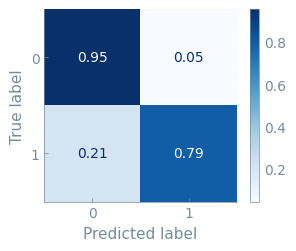

In [56]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_CO2ads_confusionMatrix_72_28_size380_RF.pdf', bbox_inches='tight')